In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv('data/vis_data.csv')

In [3]:
print(df.dtypes)

PatientID                         int64
Treatment                         int64
HRPre                           float64
HR2W                            float64
HR4W                            float64
HR18M                            object
mortality _treatement_period    float64
Mortality18M                    float64
EFPre                           float64
EF2W                            float64
EF4W                            float64
EF18M                            object
QoLPre                          float64
QoL2W                           float64
QoL4W                           float64
QoL18M                           object
AdjPreLVSize                    float64
AdjLVSize2W                     float64
AdjLVSize4W                     float64
AdjLVSize18M                    float64
dtype: object


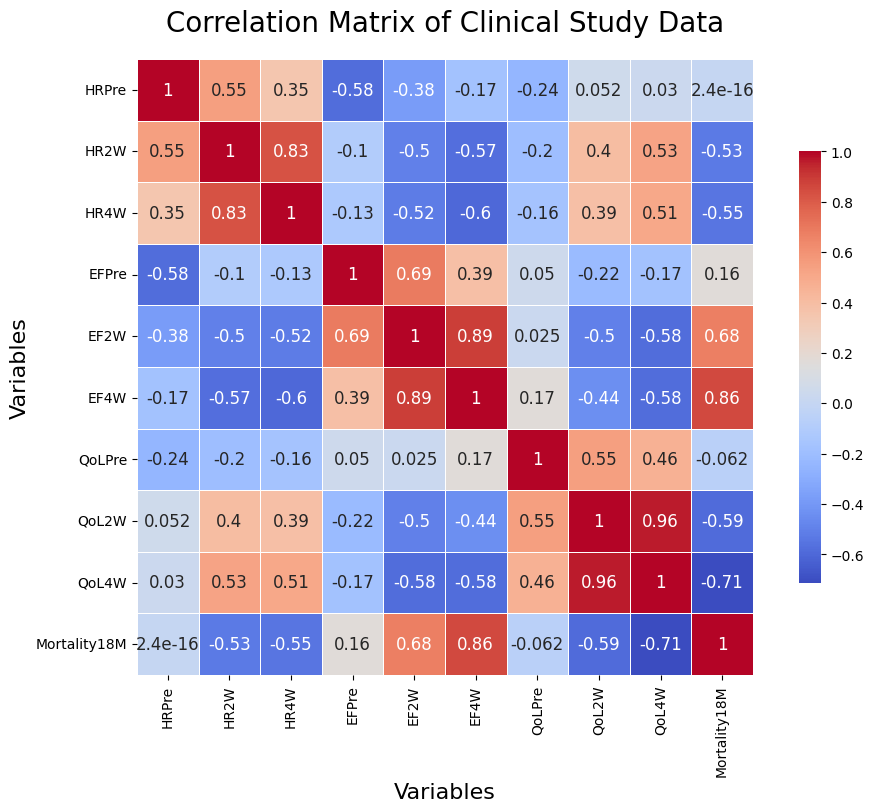

In [6]:
# Select the variables of interest
cols = ['HRPre', 'HR2W', 'HR4W', 'EFPre', 'EF2W', 'EF4W', 'QoLPre', 'QoL2W', 'QoL4W', 'Mortality18M']

# Create a correlation matrix
corr_matrix = df[cols].corr()

# Create the heatmap using Seaborn's heatmap function
plt.figure(figsize=(12,8)) # set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, square=True, cbar_kws={"shrink": .7}, annot_kws={"size": 12})

# Customize the plot
plt.title("Correlation Matrix of Clinical Study Data", fontsize=20, pad =20)
plt.xlabel("Variables", fontsize=16)
plt.ylabel("Variables", fontsize=16)

# Show the plot
plt.show()
# Show the plot
plt.show()


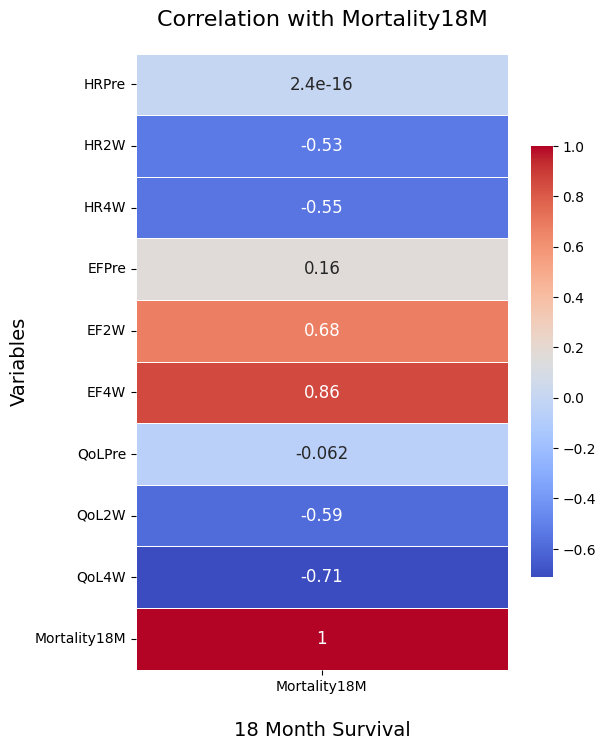

In [12]:
# Select the variables of interest
cols = ['HRPre', 'HR2W', 'HR4W', 'EFPre', 'EF2W', 'EF4W', 'QoLPre', 'QoL2W', 'QoL4W', 'Mortality18M']

# Create a correlation matrix between Mortality18M and other variables
corr_matrix = df[cols].corr()[['Mortality18M']]

# Create the heatmap using Seaborn's heatmap function
plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .7}, annot_kws={"size": 12})

# Customize the plot
plt.title("Correlation with Mortality18M", fontsize=16, pad=20)
plt.xlabel("18 Month Survival", fontsize=14, labelpad=20)
plt.ylabel("Variables", fontsize=14)

# Show the plot
plt.show()


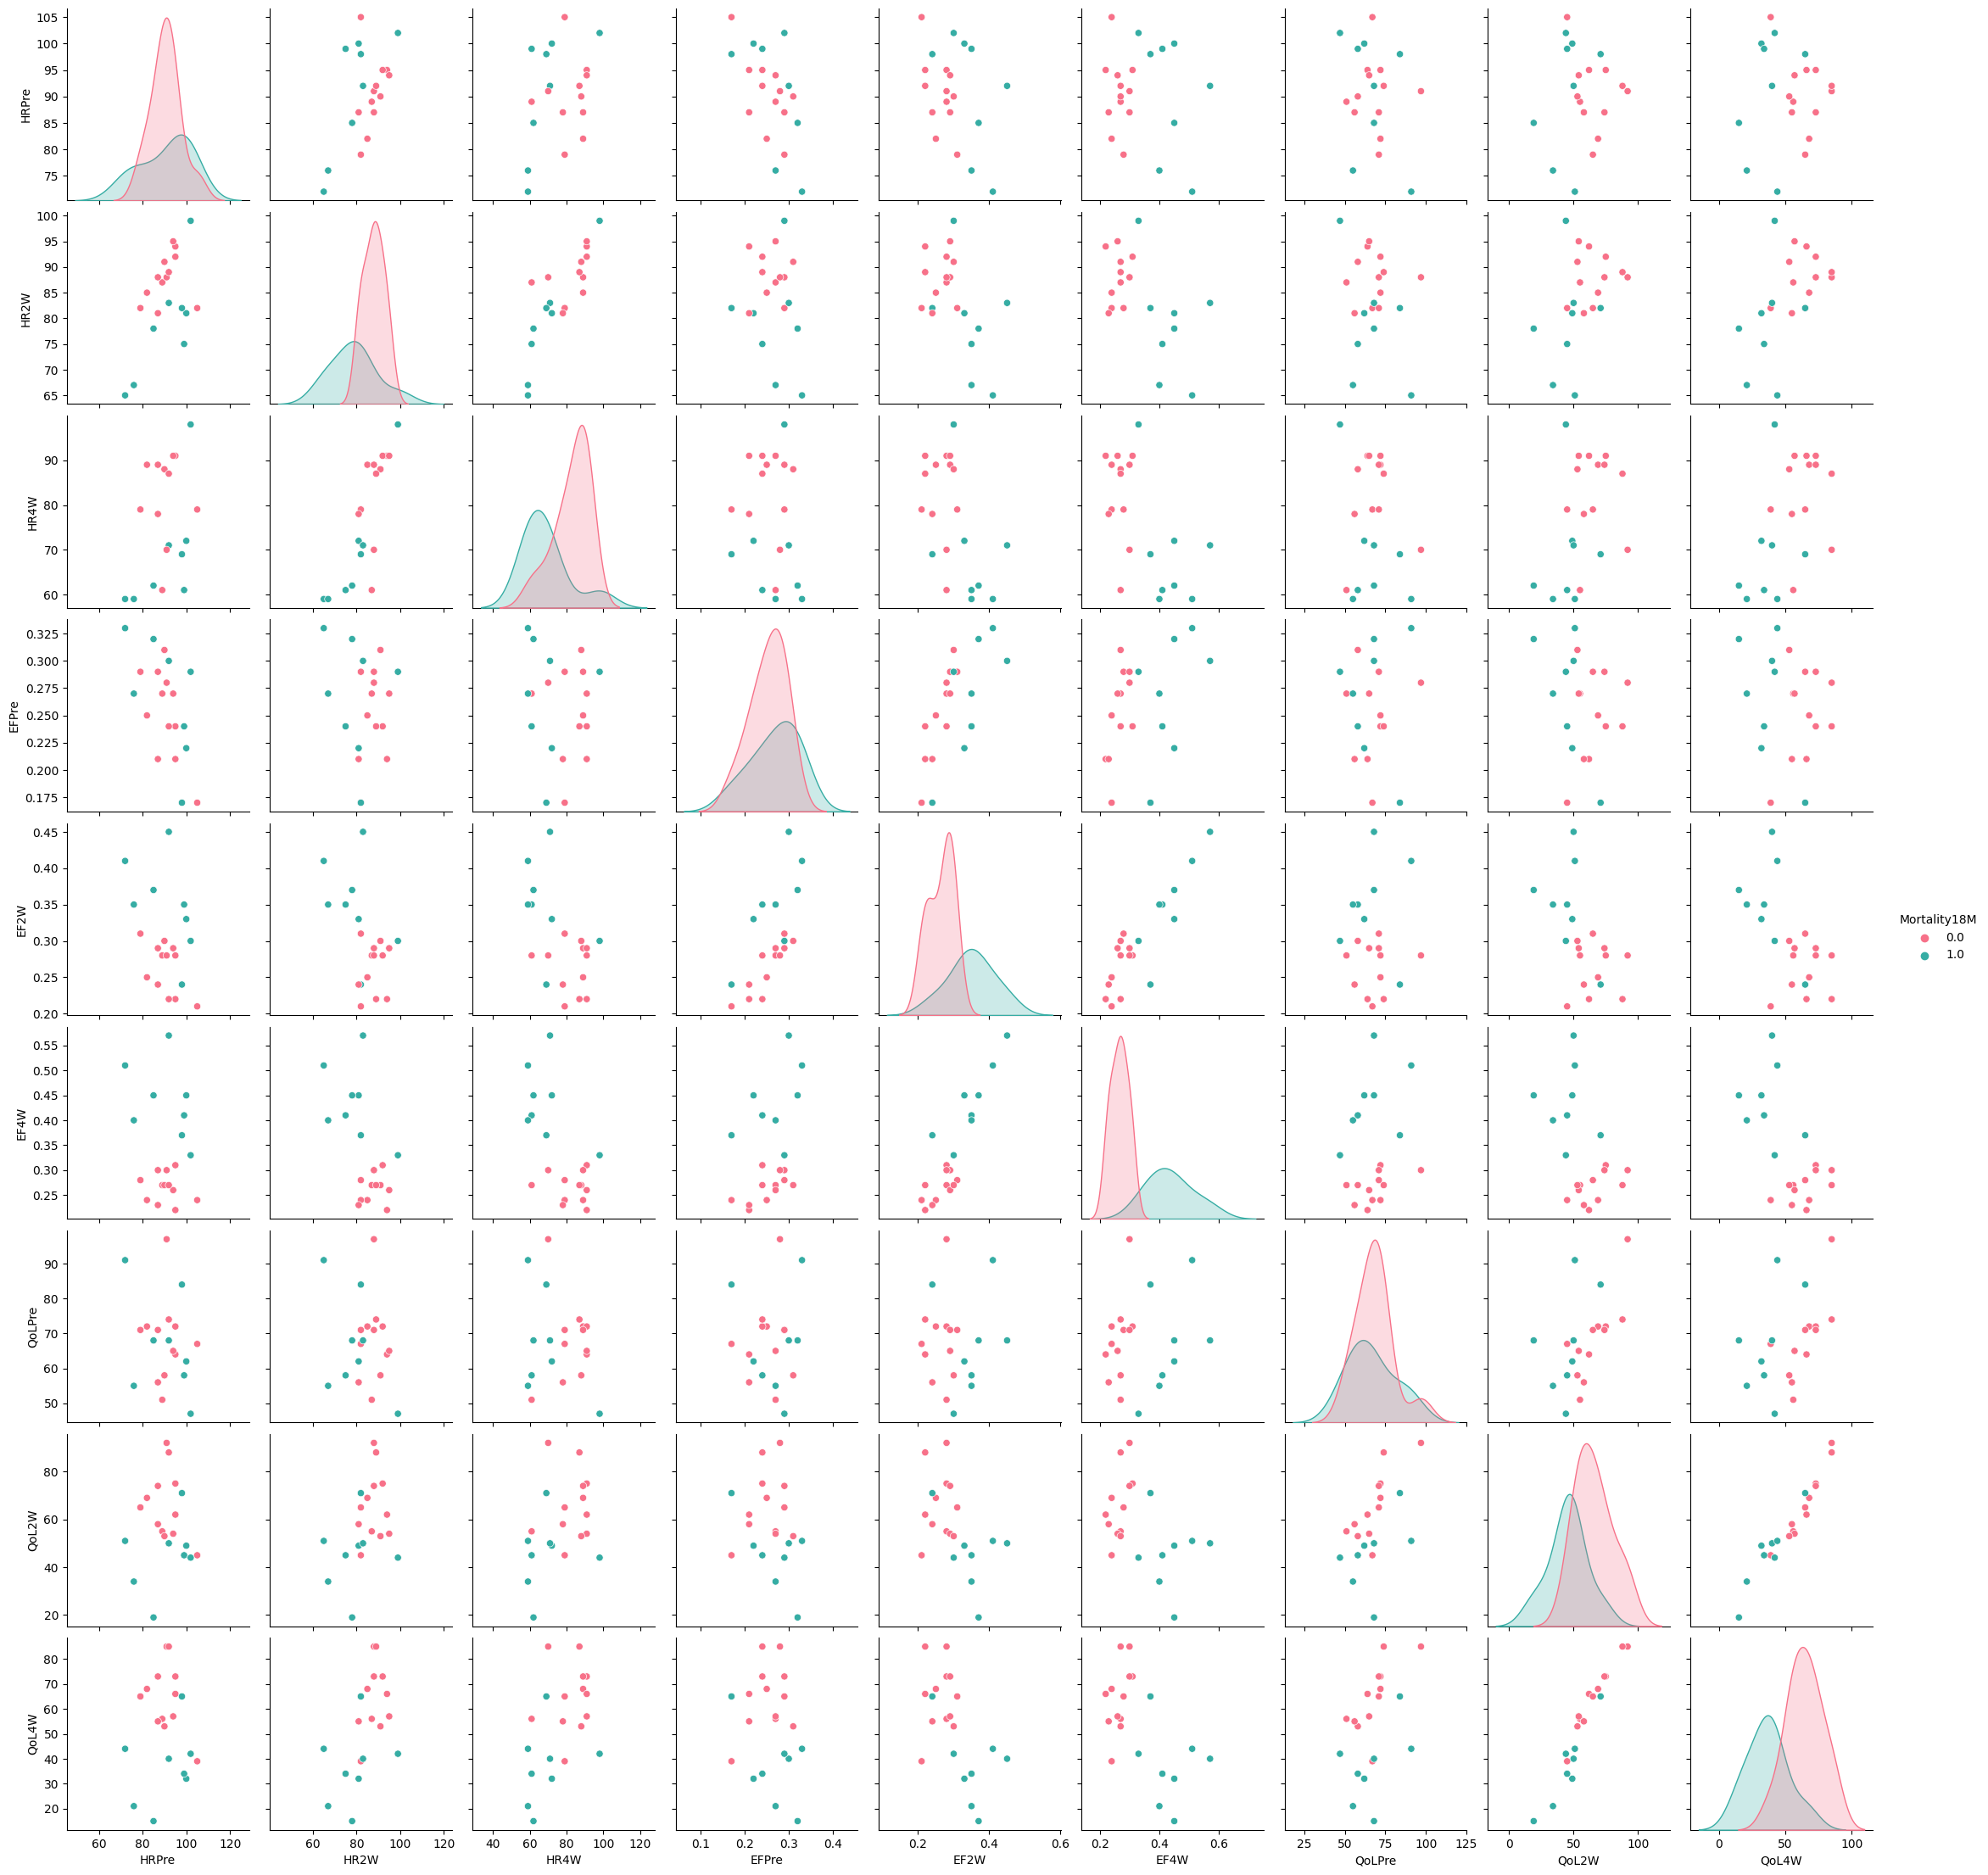

In [14]:
# Select the variables of interest
cols = ['HRPre', 'HR2W', 'HR4W', 'EFPre', 'EF2W', 'EF4W', 'QoLPre', 'QoL2W', 'QoL4W', 'Mortality18M']

# Create the pairplot using Seaborn's pairplot function
sns.pairplot(df[cols], hue='Mortality18M', palette='husl')

# Show the plot
plt.show()

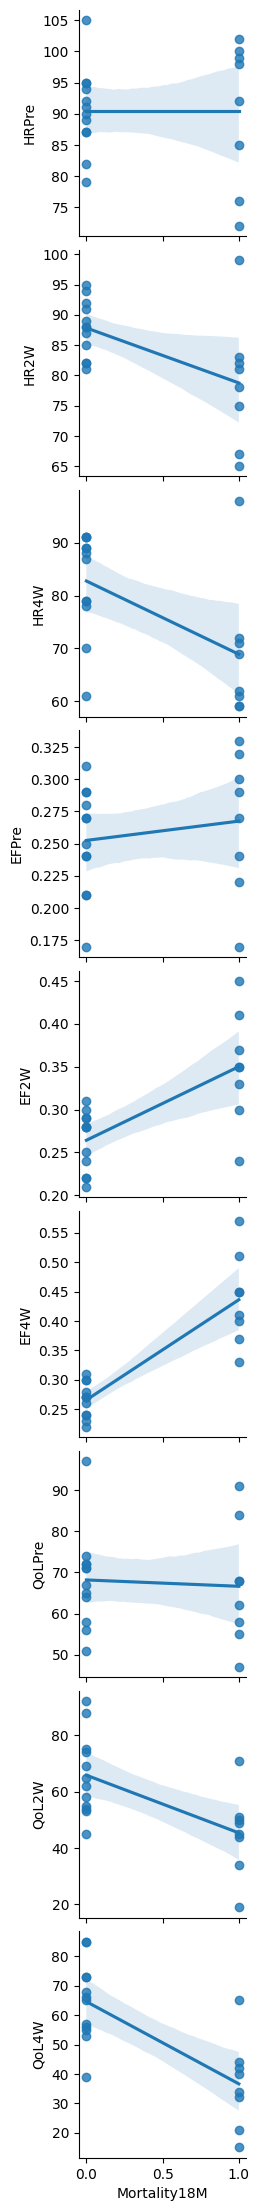

In [16]:
# Select the variables of interest
cols = ['HRPre', 'HR2W', 'HR4W', 'EFPre', 'EF2W', 'EF4W', 'QoLPre', 'QoL2W', 'QoL4W', 'Mortality18M']

# Create the pairplot using Seaborn's pairplot function
sns.pairplot(df[cols], x_vars=['Mortality18M'], y_vars=cols[:-1], kind='reg')

# Show the plot
plt.show()

ValueError: not enough values to unpack (expected 5, got 2)

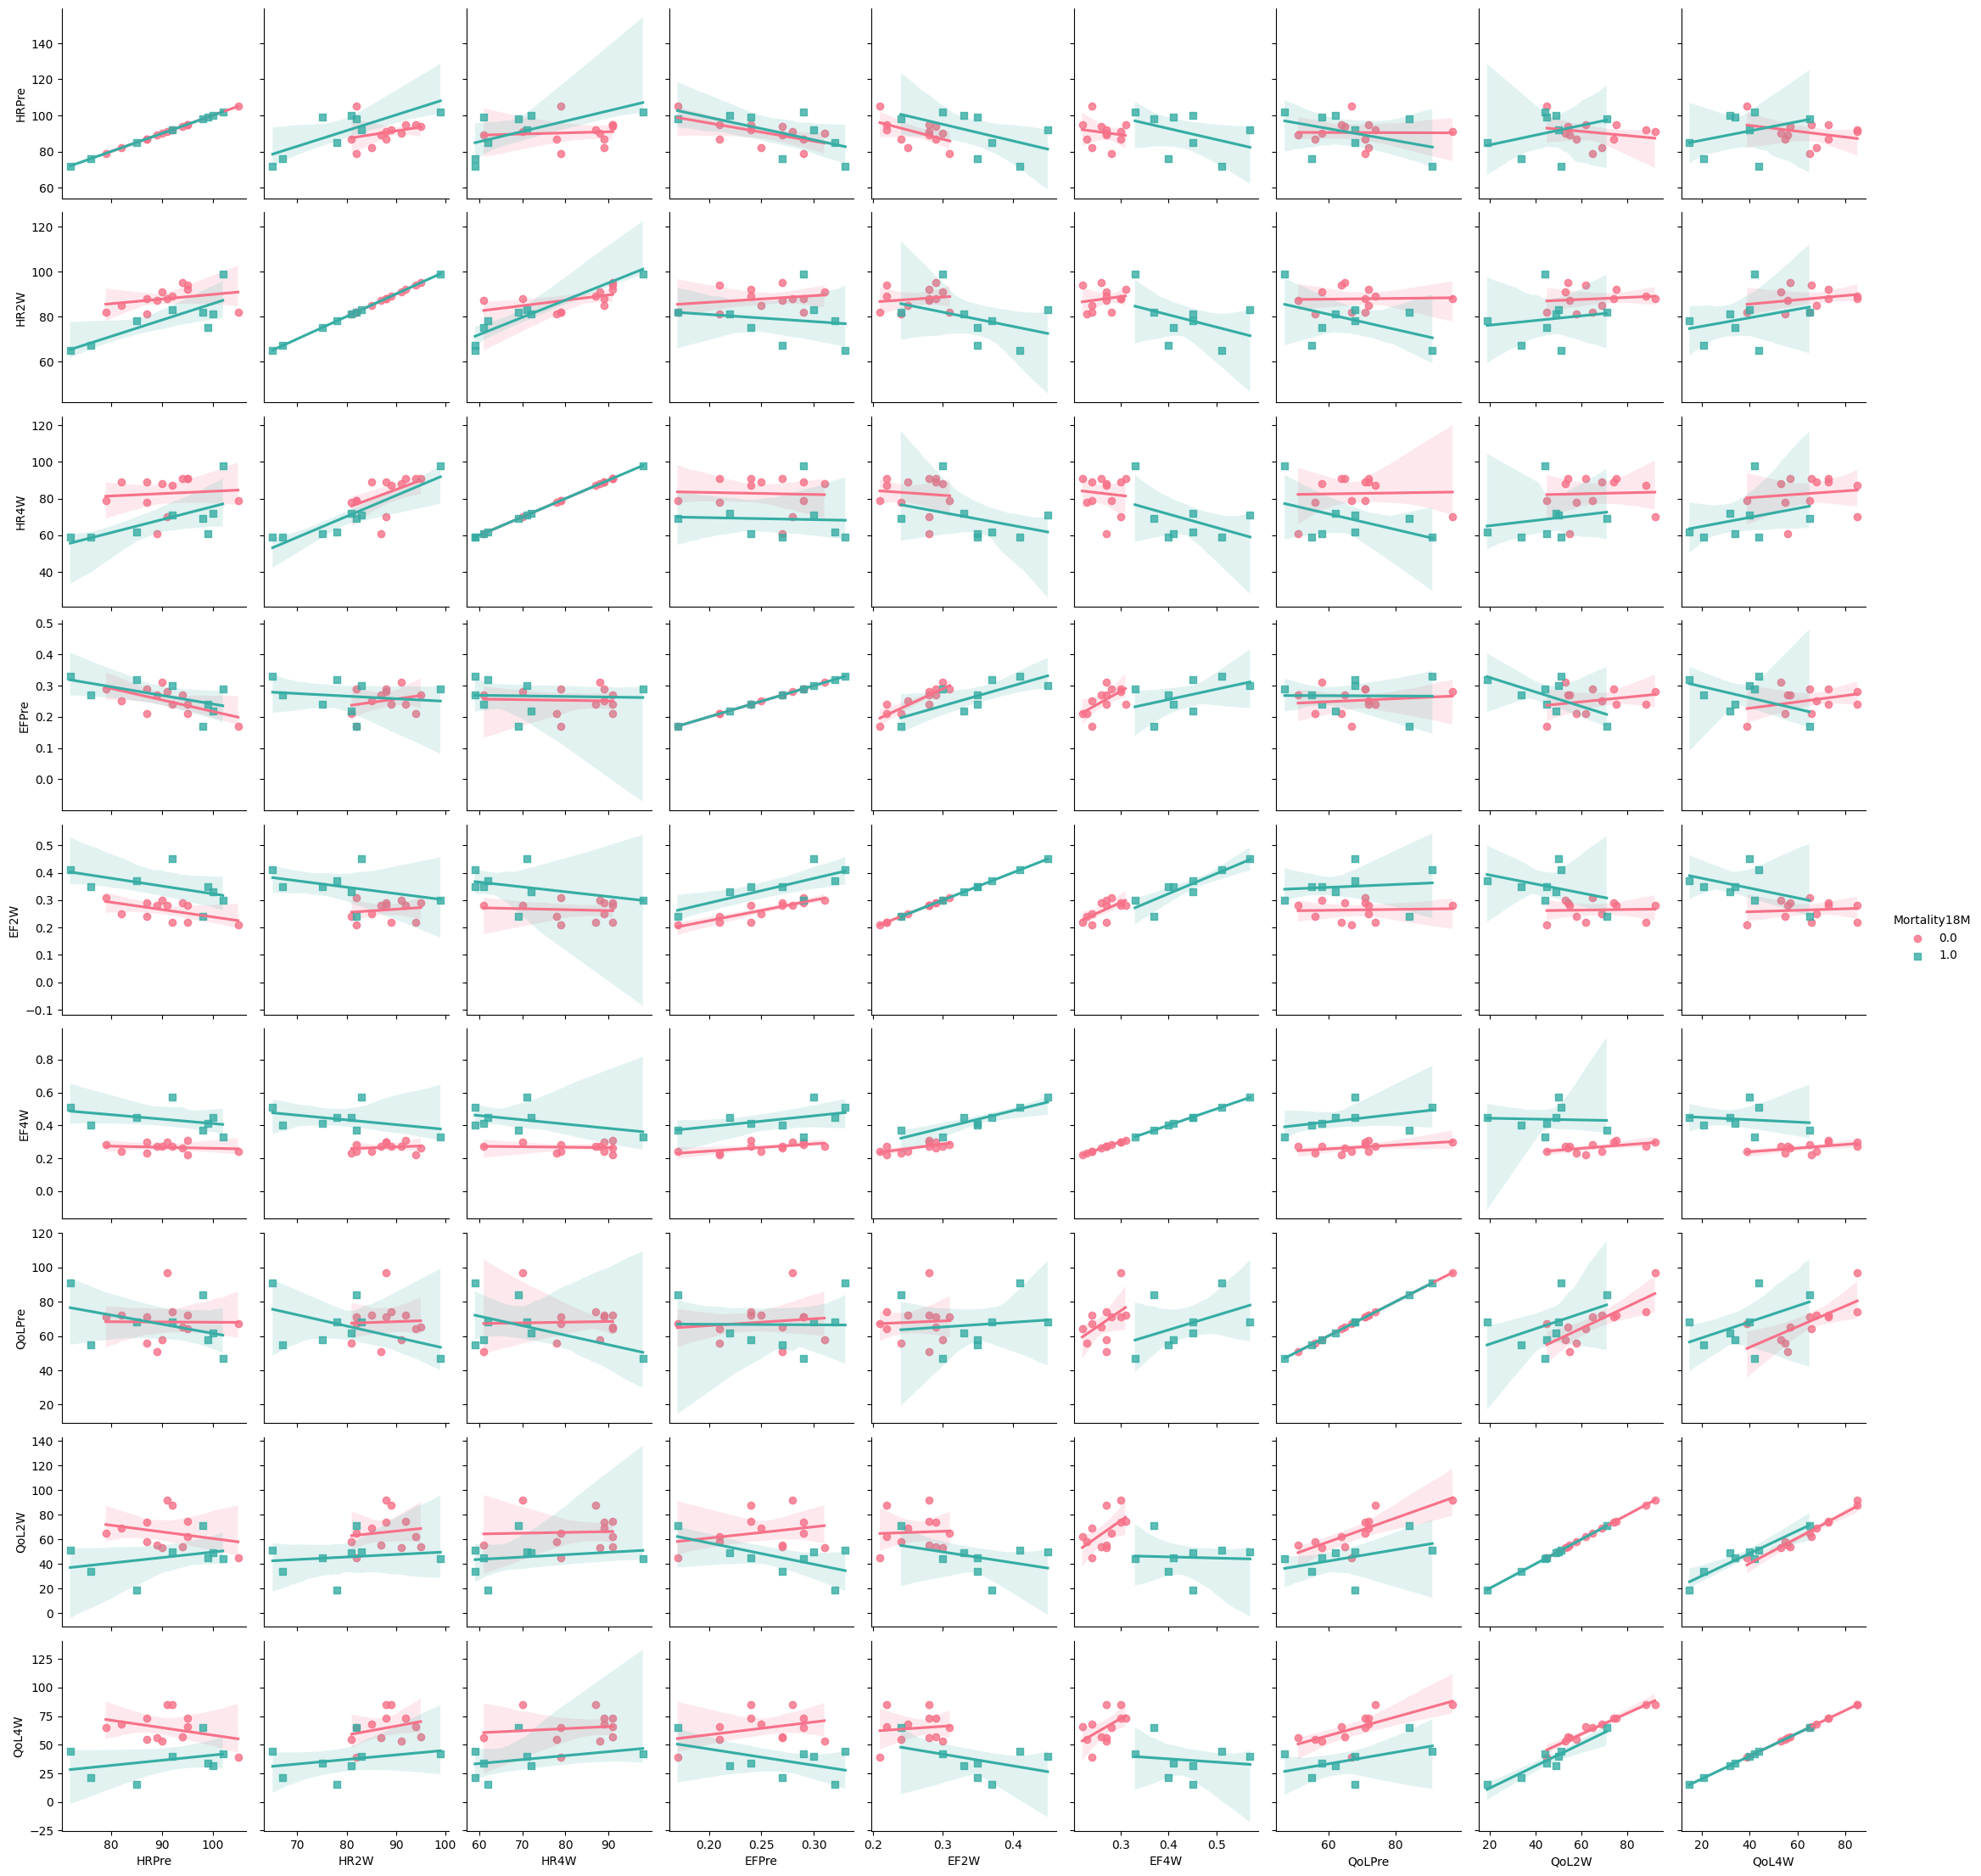

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



# Select the variables of interest
cols = ['HRPre', 'HR2W', 'HR4W', 'EFPre', 'EF2W', 'EF4W', 'QoLPre', 'QoL2W', 'QoL4W', 'Mortality18M']

# Create the pairplot using Seaborn's pairplot function
pair_grid = sns.pairplot(df[cols], hue='Mortality18M', palette='husl', markers=["o", "s"], diag_kind=None, kind="reg")

# Add R-squared value to each scatter plot
for i, j in zip(*np.triu_indices_from(pair_grid.axes, 1)):
    ax = pair_grid.axes[i, j]
    x = ax.collections[0].get_offsets()[:, 0]
    y = ax.collections[0].get_offsets()[:, 1]
    slope, intercept, r_value, p_value, std_err = pearsonr(x, y)
    r_squared = round(r_value ** 2, 2)
    ax.annotate(f"$R^2$ = {r_squared}", xy=(.1, .9), xycoords=ax.transAxes, fontsize=12)

# Show the plot
plt.show()


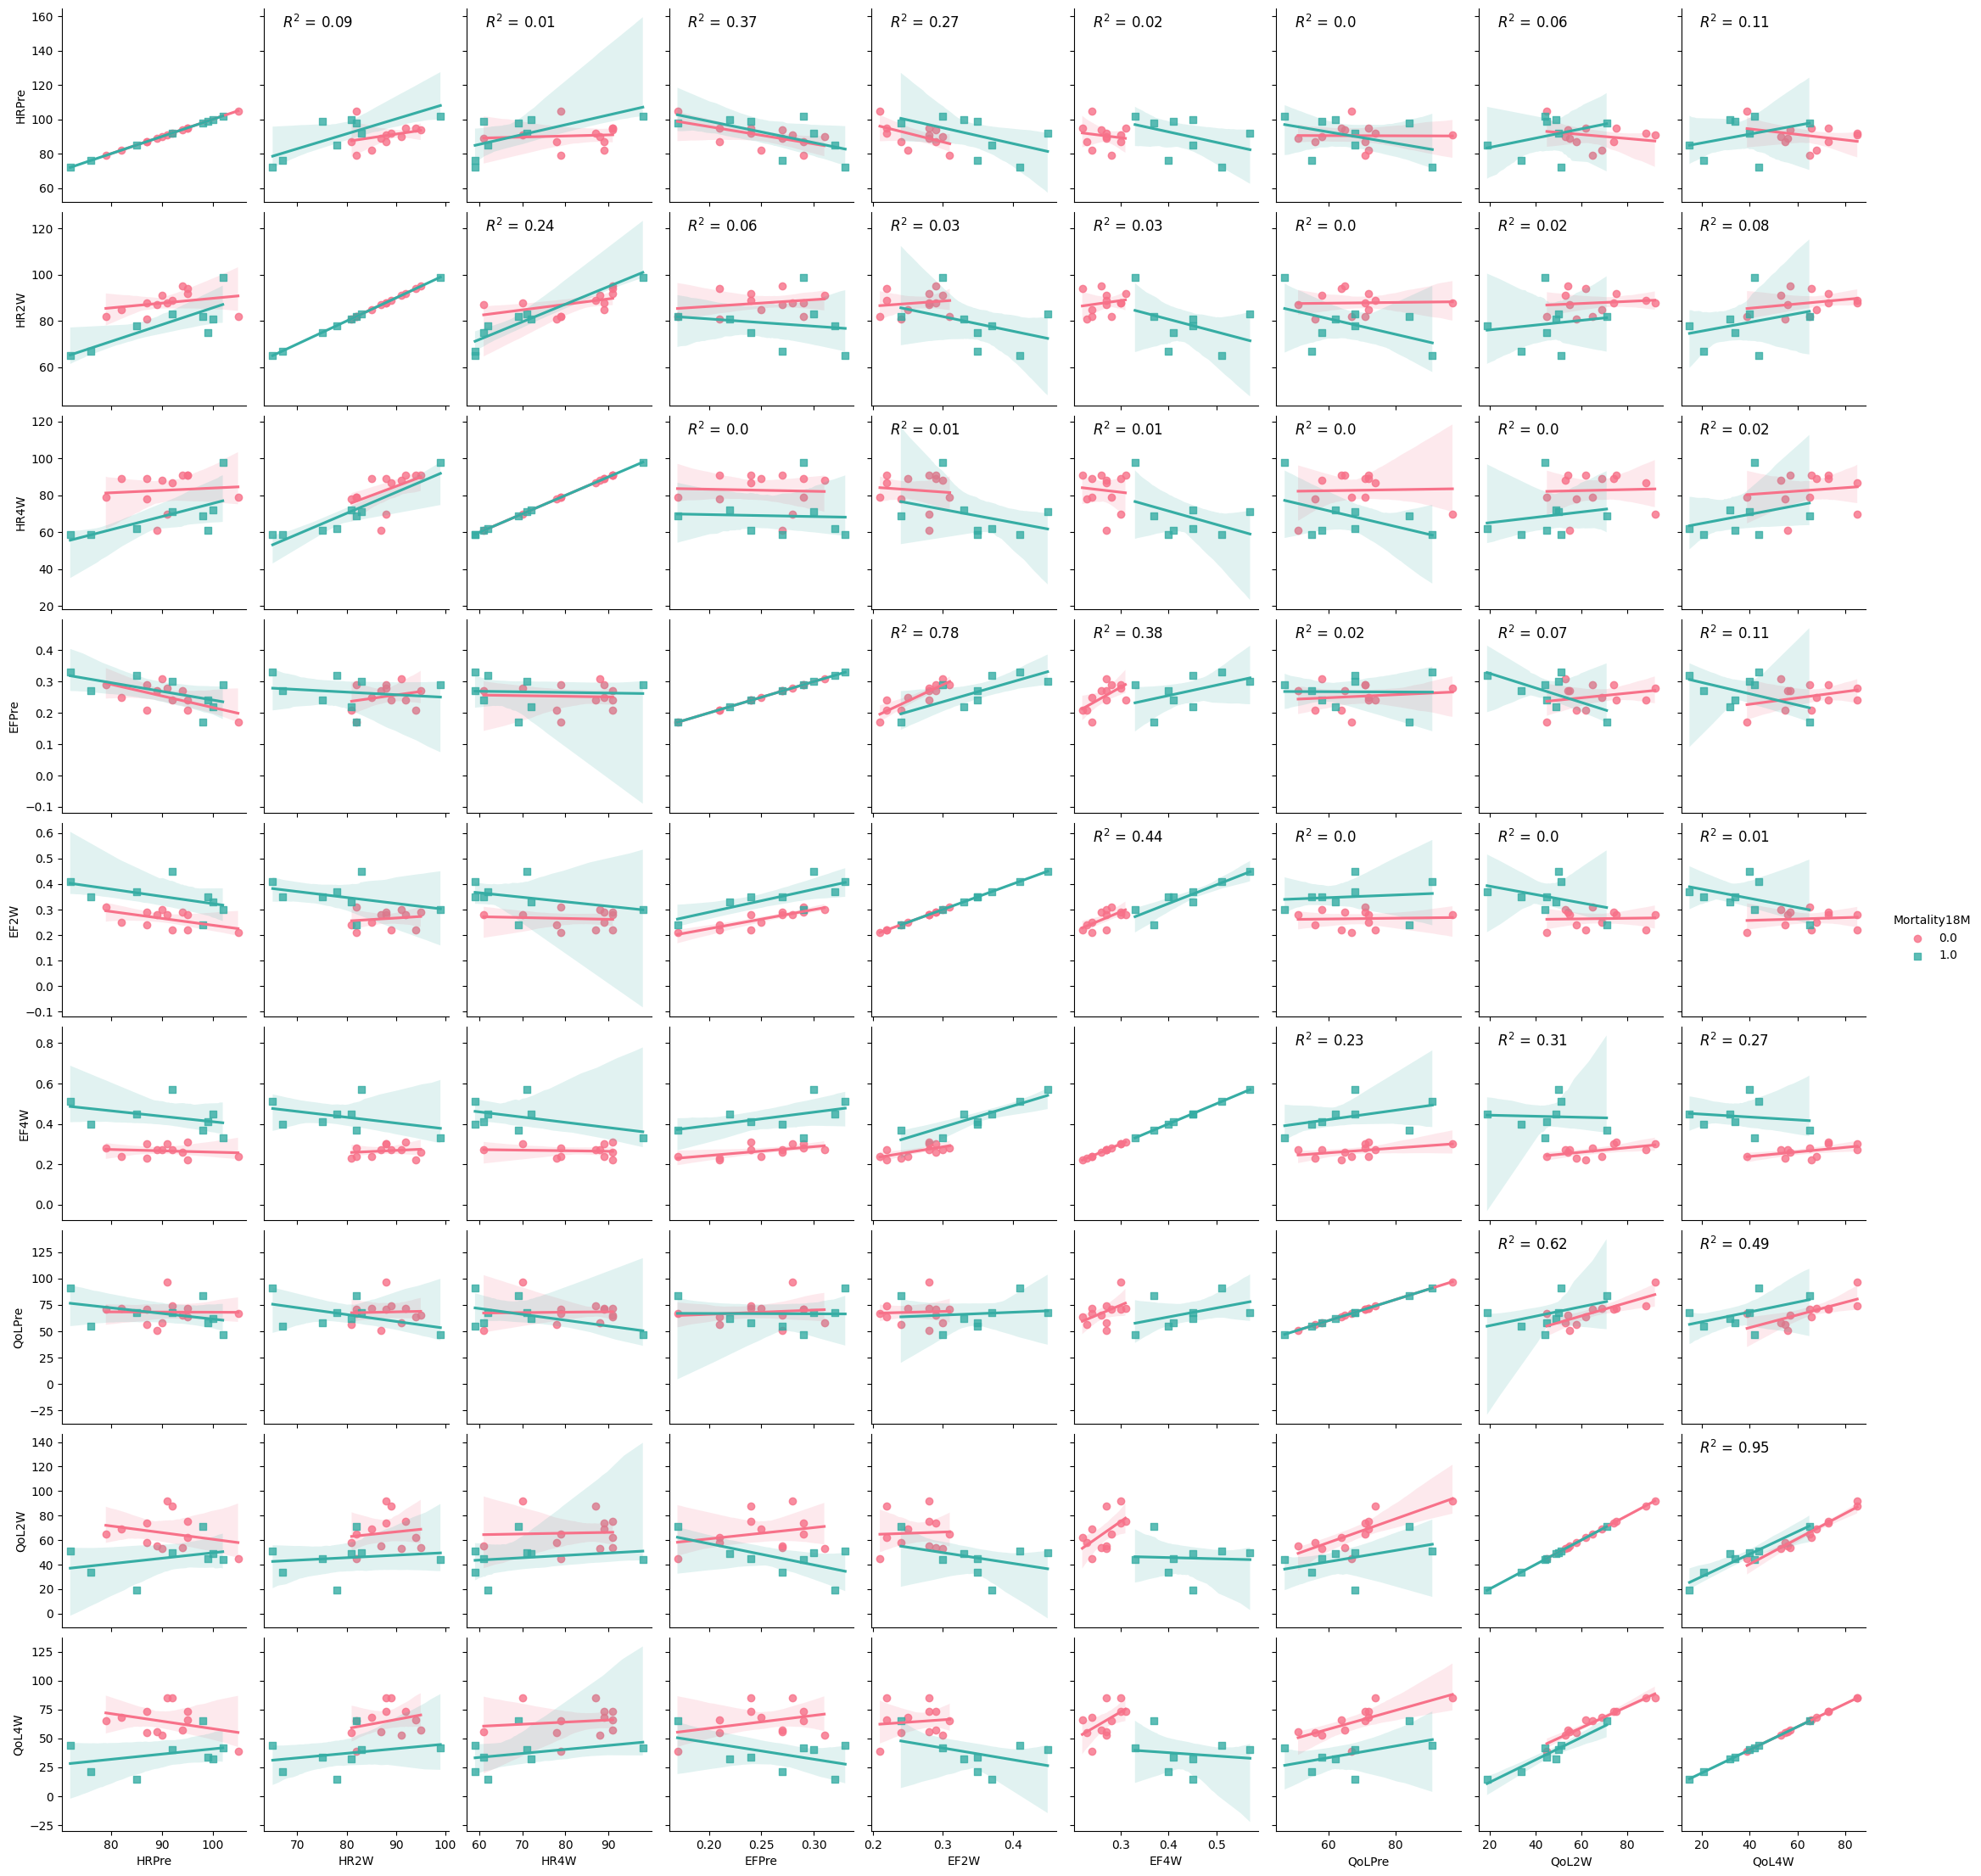

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Select the variables of interest
cols = ['HRPre', 'HR2W', 'HR4W', 'EFPre', 'EF2W', 'EF4W', 'QoLPre', 'QoL2W', 'QoL4W', 'Mortality18M']

# Create the pairplot using Seaborn's pairplot function
pair_grid = sns.pairplot(df[cols], hue='Mortality18M', palette='husl', markers=["o", "s"], diag_kind=None, kind="reg")

# Add R-squared value to each scatter plot
for i, j in zip(*np.triu_indices_from(pair_grid.axes, 1)):
    ax = pair_grid.axes[i, j]
    x = ax.collections[0].get_offsets()[:, 0]
    y = ax.collections[0].get_offsets()[:, 1]
    r, p = pearsonr(x, y)
    r_squared = round(r ** 2, 2)
    ax.annotate(f"$R^2$ = {r_squared}", xy=(.1, .9), xycoords=ax.transAxes, fontsize=12)

# Show the plot
plt.show()



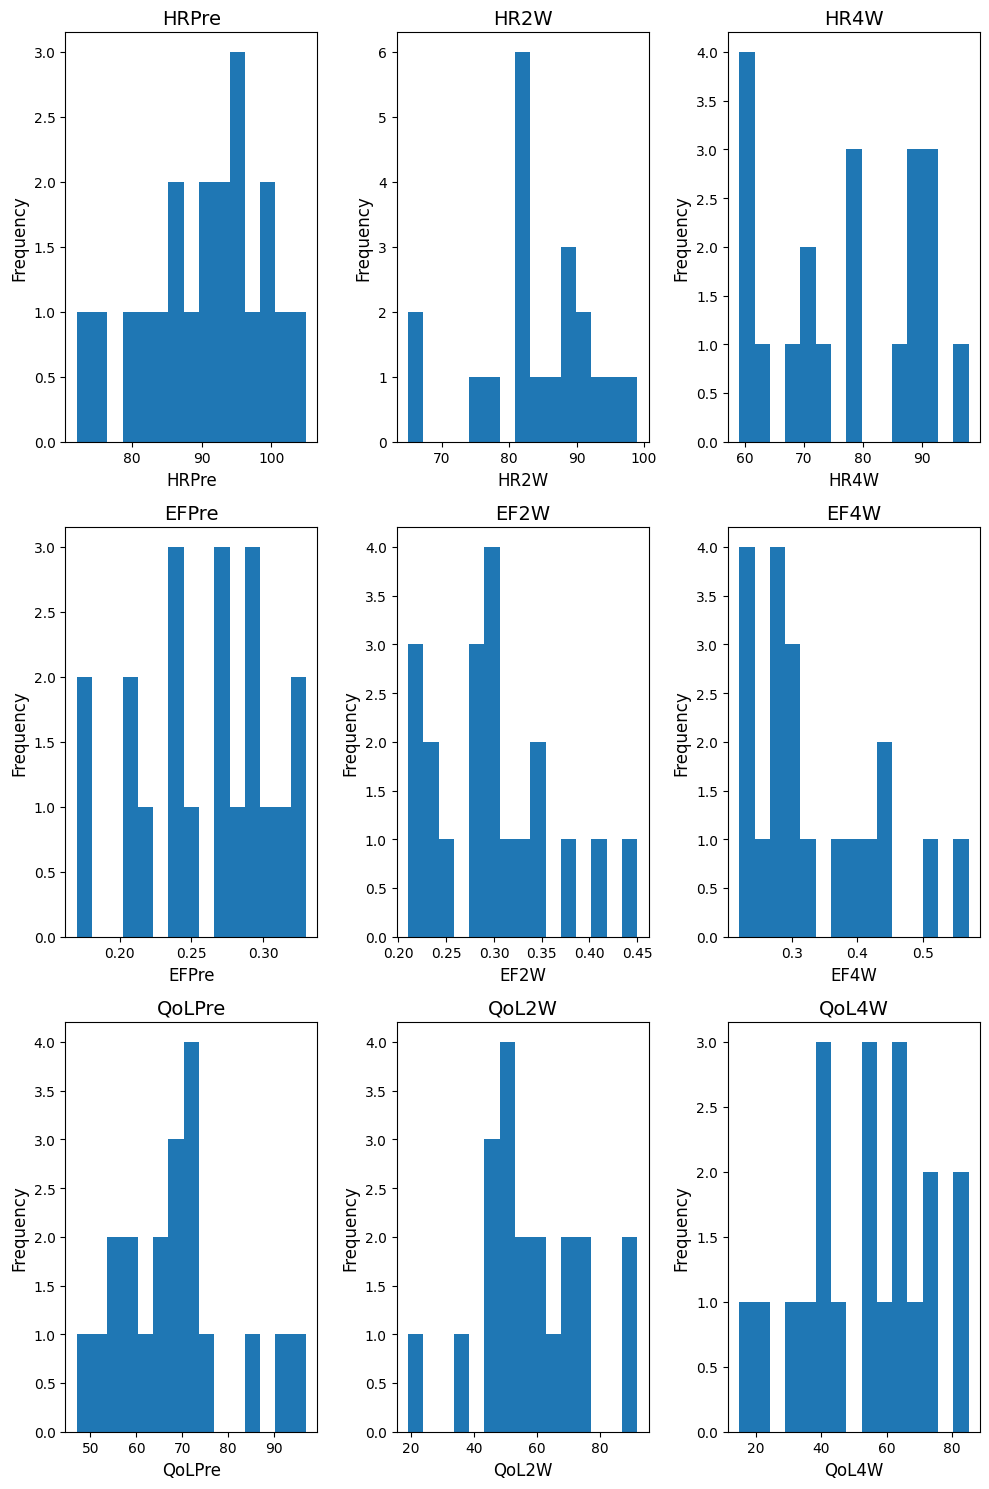

In [23]:
cols = ['HRPre', 'HR2W', 'HR4W', 'EFPre', 'EF2W', 'EF4W', 'QoLPre', 'QoL2W', 'QoL4W']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))
axes = axes.ravel()

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=15)
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    
plt.tight_layout()
plt.show()